In [ ]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import sklearn

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [ ]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
heart=pd.read_csv('heart.csv')

In [ ]:
   heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  Target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
heart['Age']

0      40
1      49
2      37
3      48
4      54
       ..
913    45
914    68
915    57
916    57
917    38
Name: Age, Length: 918, dtype: int64

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure","serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)","maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversible defect"]

for i in range(len(info)):
  print("Column "+ str(i+1) + ":\t\t\t"+info[i])

Column 1:			age
Column 2:			1: male, 0: female
Column 3:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
Column 4:			resting blood pressure
Column 5:			serum cholestoral in mg/dl
Column 6:			fasting blood sugar > 120 mg/dl
Column 7:			resting electrocardiographic results (values 0,1,2)
Column 8:			maximum heart rate achieved
Column 9:			exercise induced angina
Column 10:			oldpeak = ST depression induced by exercise relative to rest
Column 11:			the slope of the peak exercise ST segment
Column 12:			number of major vessels (0-3) colored by flourosopy
Column 13:			thal: 3 = normal; 6 = fixed defect; 7 = reversible defect


In [ ]:
heart.shape

(918, 12)

In [ ]:
heart.size

11016

In [ ]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  Target          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


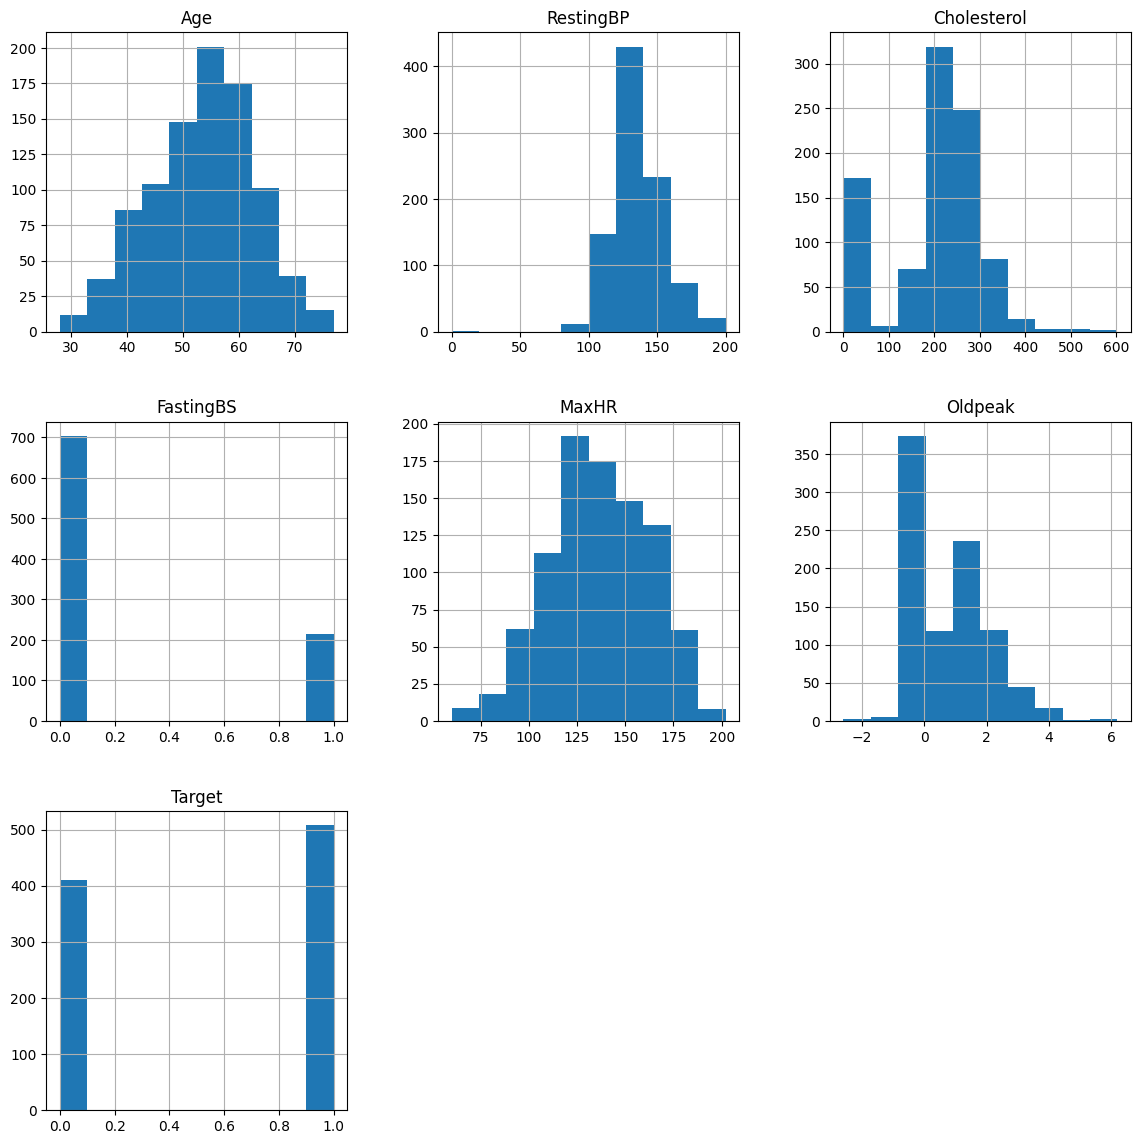

In [ ]:
heart.hist(figsize=(14,14))
plt.show()

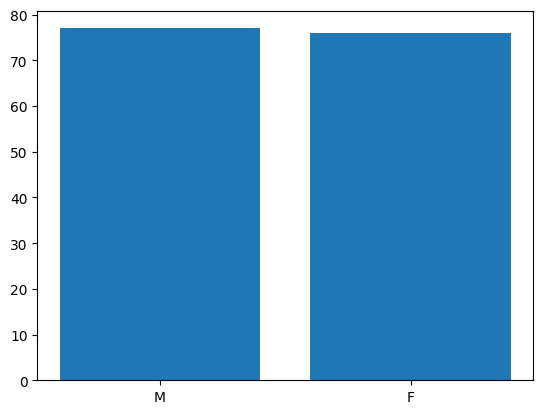

In [ ]:
plt.bar(x=heart['Sex'],height=heart['Age'])
plt.show()

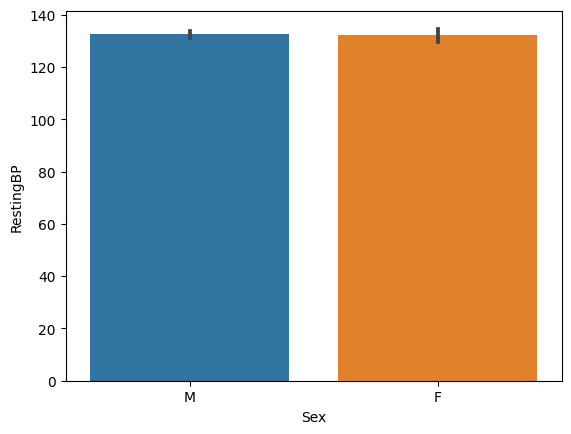

In [ ]:
sns.barplot(x="Sex", y="RestingBP", data=heart)
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

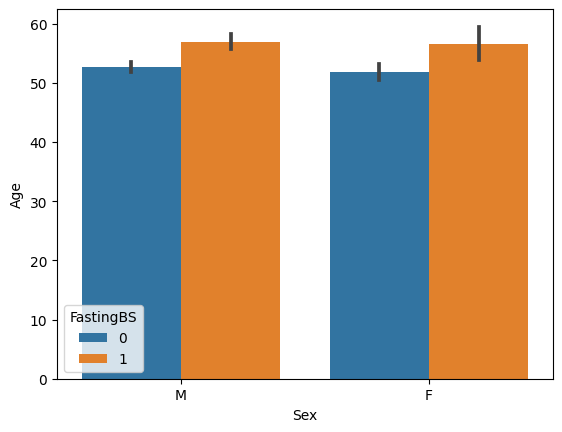

In [ ]:
sns.barplot(x=heart['Sex'],y=heart['Age'],hue=heart['FastingBS'])

<ipython-input-16-81595dce4d6f>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Cholesterol', ylabel='Density'>

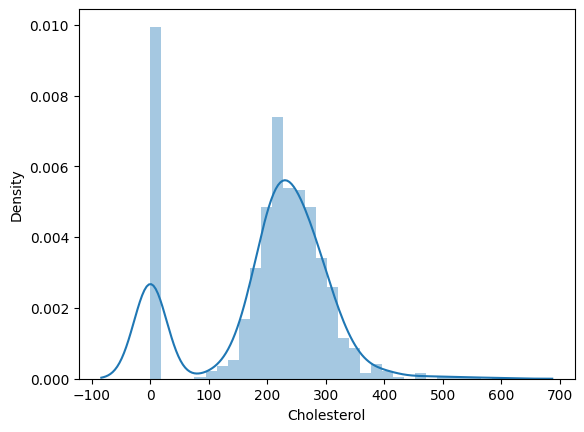

In [ ]:
sns.distplot(heart["Cholesterol"])

<ipython-input-17-698ee66fb599>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='RestingBP', ylabel='Density'>

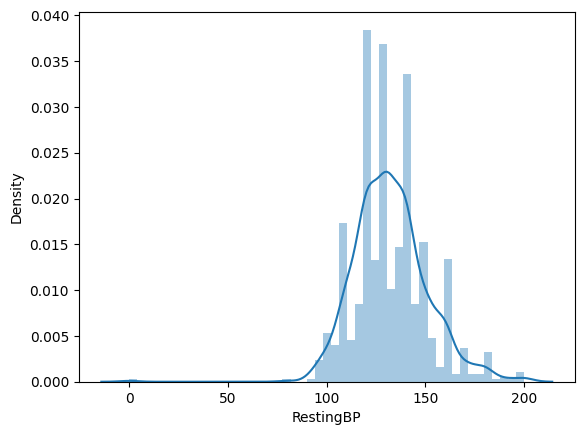

In [ ]:
sns.distplot(heart["RestingBP"])

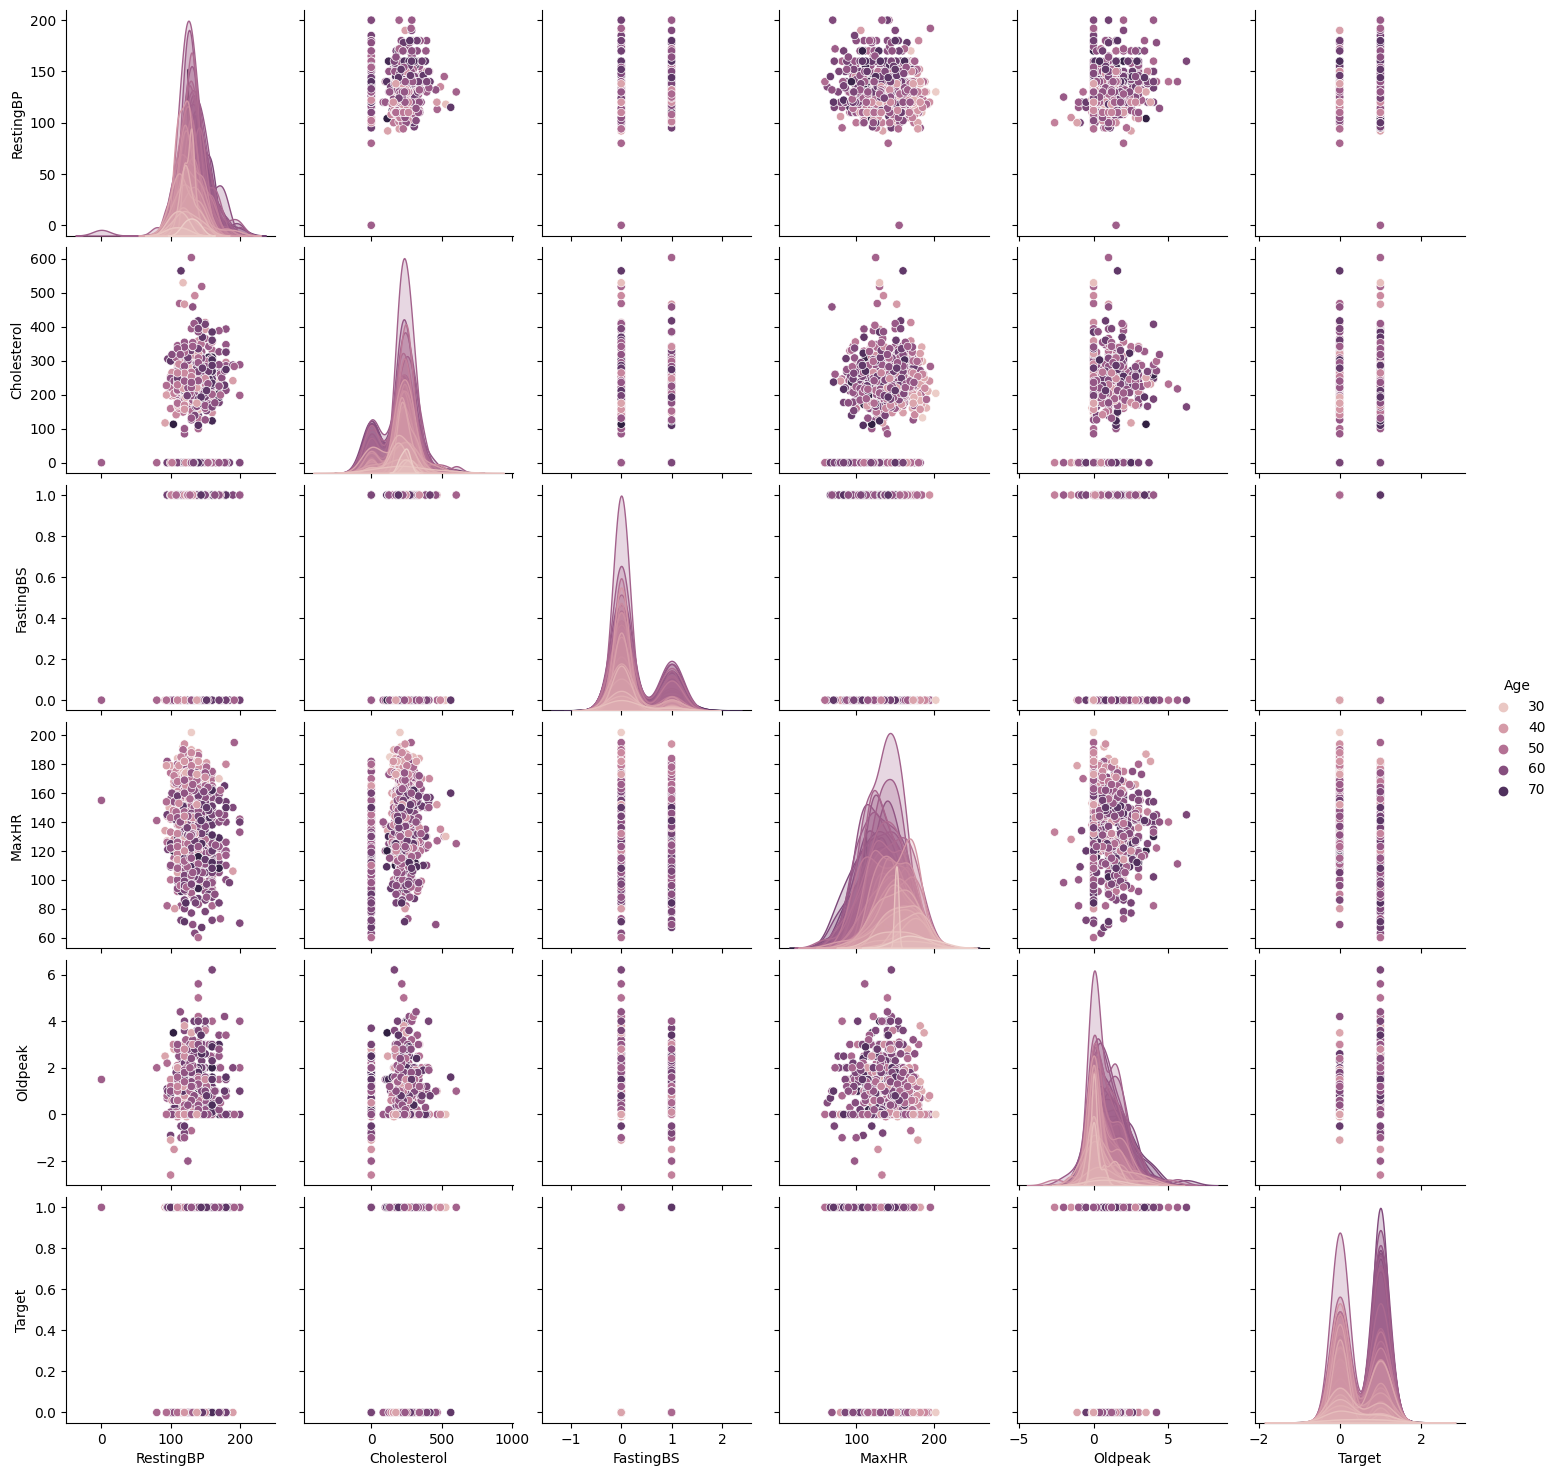

In [ ]:
sns.pairplot(heart,hue='Age')

In [ ]:
numeric_columns=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak',]

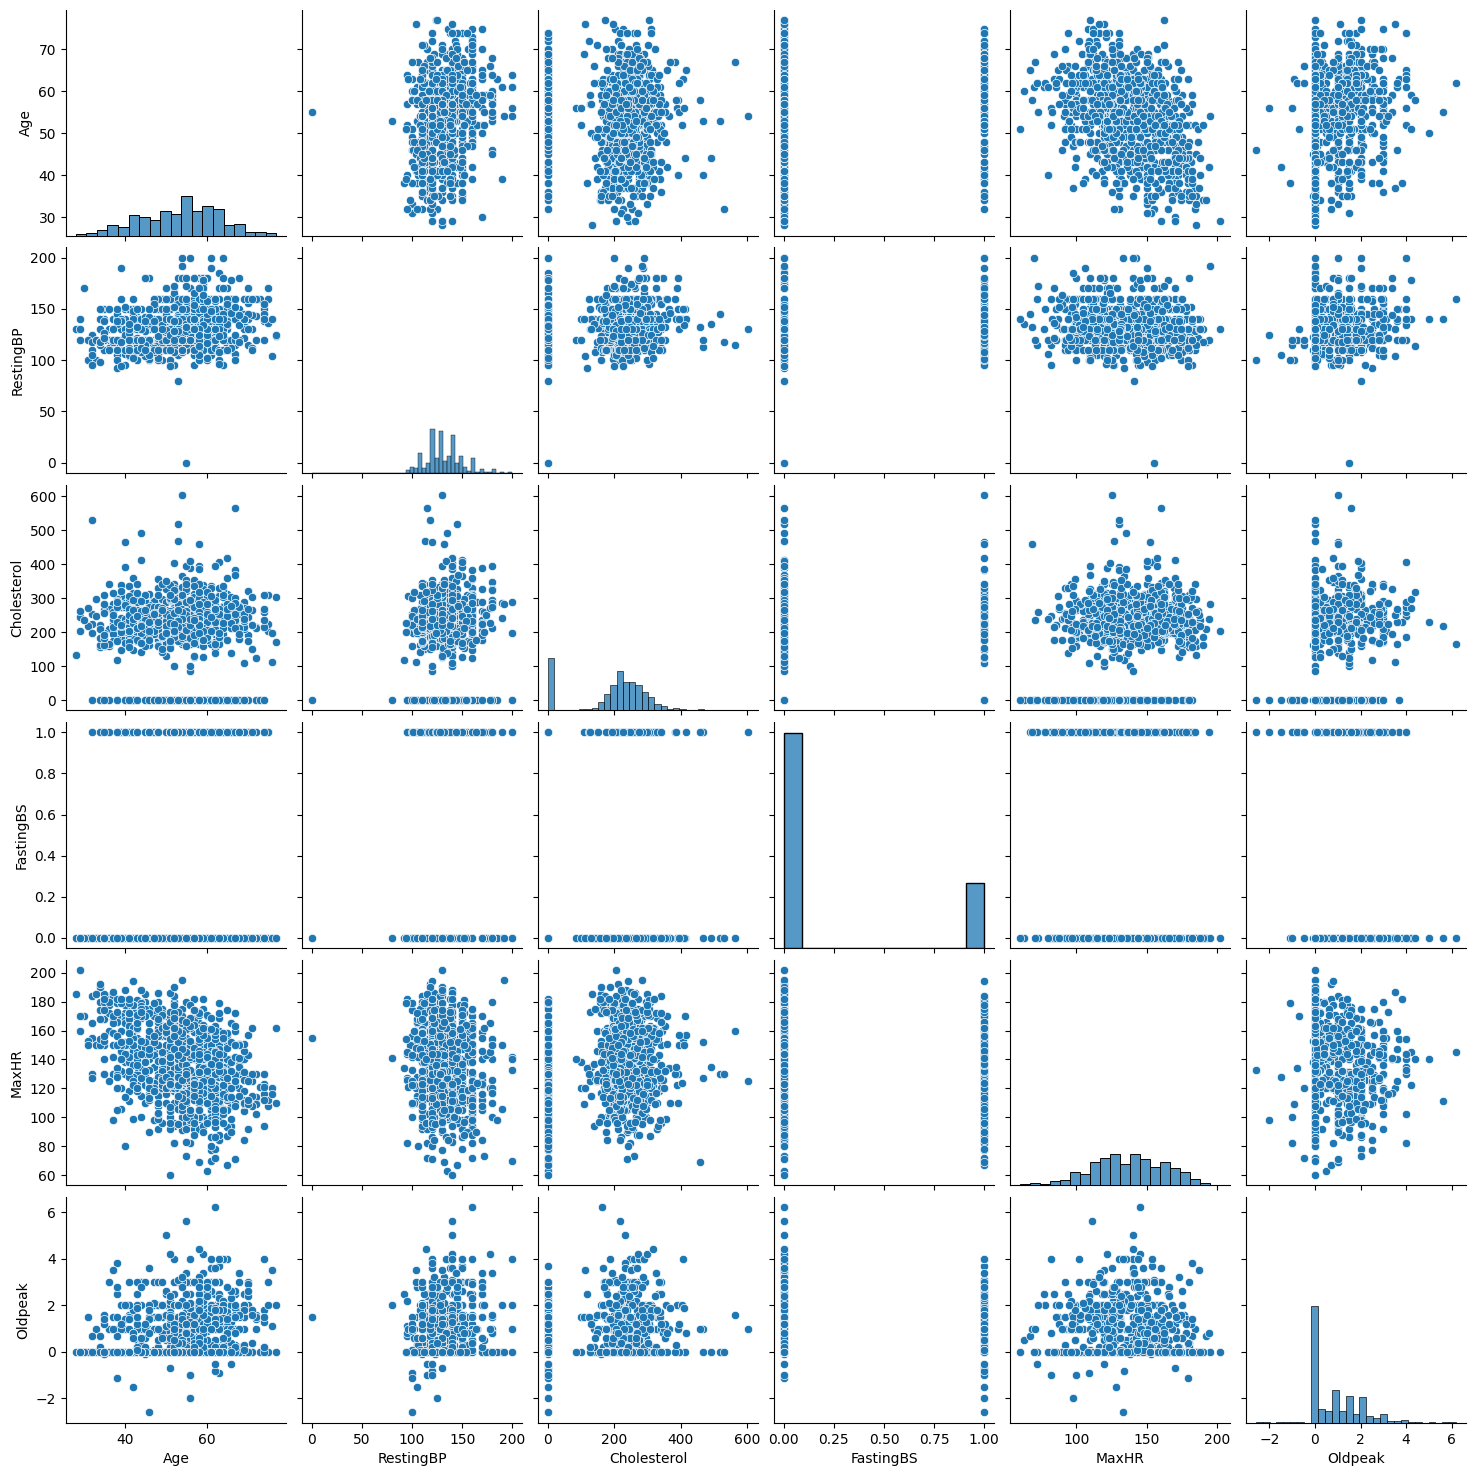

In [ ]:
sns.pairplot(heart[numeric_columns])
mukjbfk

0    704
1    214
Name: FastingBS, dtype: int64


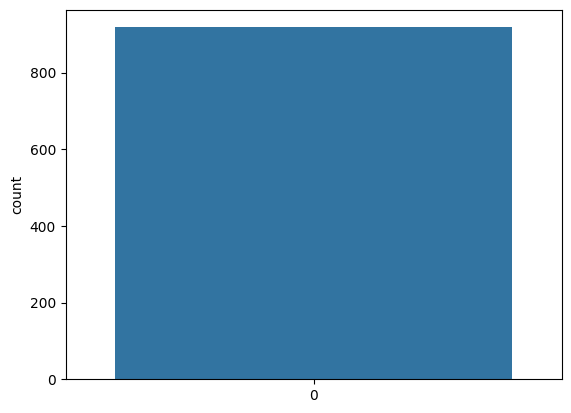

In [ ]:
y = heart["FastingBS"]

sns.countplot(y)

FastingBS_temp = heart.FastingBS.value_counts()

print(FastingBS_temp)

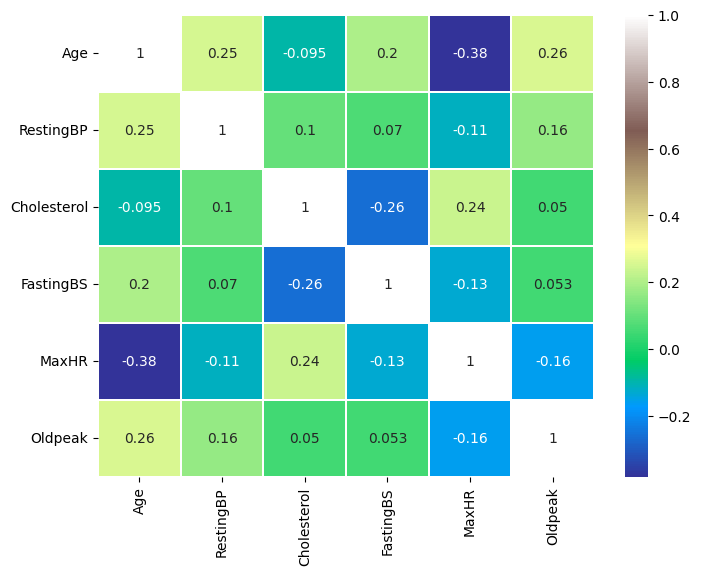

In [ ]:
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

<ipython-input-23-ea813c95420e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-23-ea813c95420e>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-23-ea813c95420e>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

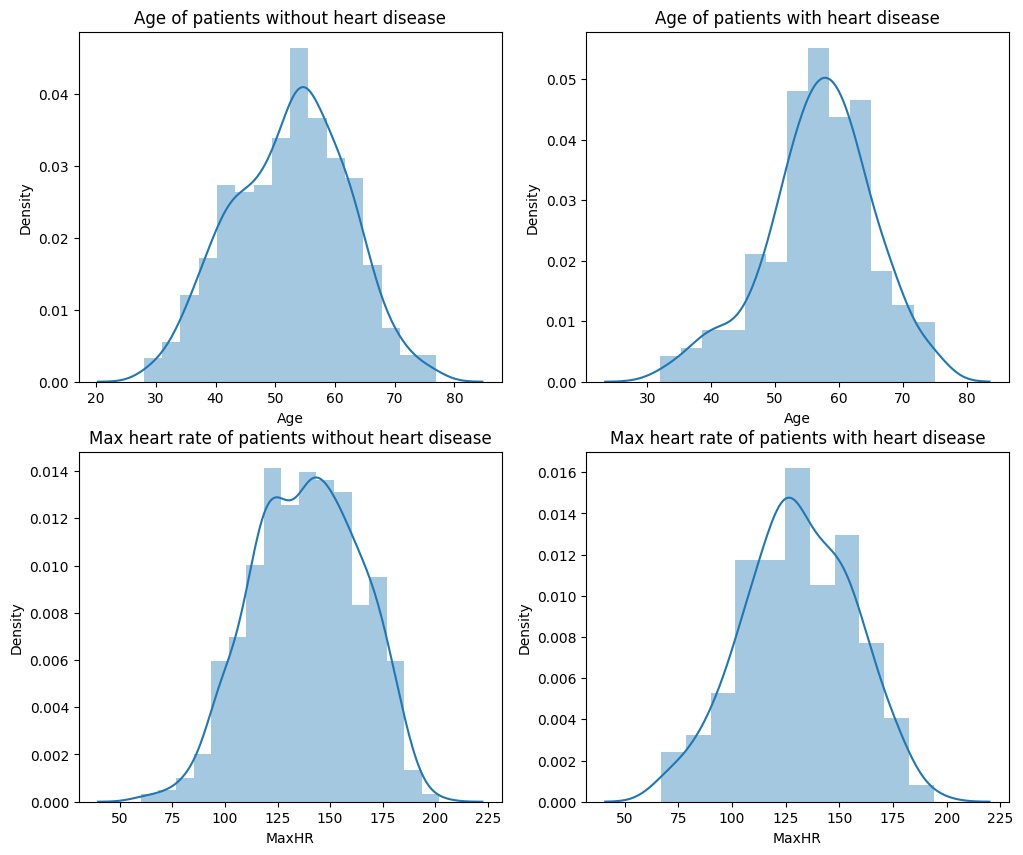

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['FastingBS']==0].Age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['FastingBS']==1].Age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['FastingBS']==0].MaxHR )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['FastingBS']==1].MaxHR )
plt.title('Max heart rate of patients with heart disease')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



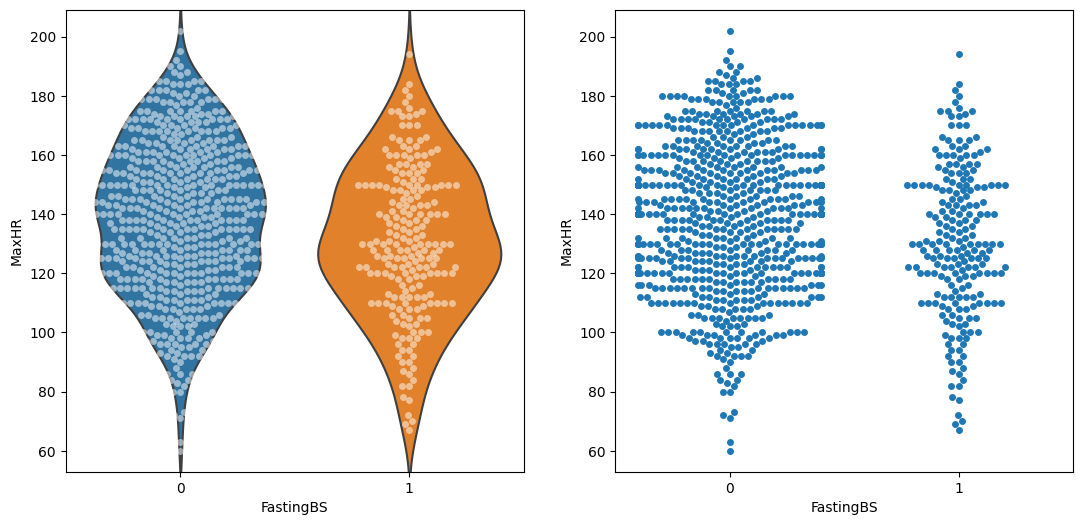

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="FastingBS", y="MaxHR", data=heart, inner=None)
sns.swarmplot(x="FastingBS", y="MaxHR", data=heart, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="FastingBS", y="MaxHR", data=heart)
plt.show()

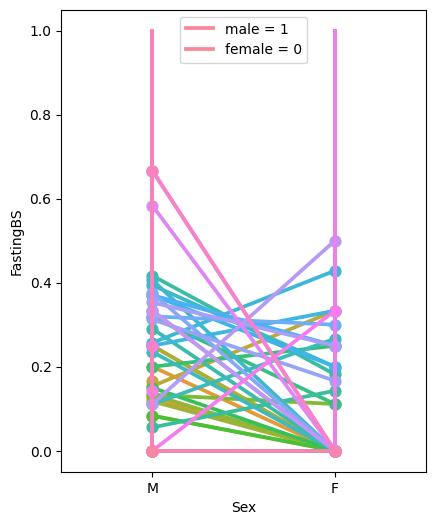

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="Sex", y="FastingBS", hue='Age', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.show()

In [ ]:
heart['FastingBS'].sum()


214

In [ ]:
heart['FastingBS'].isnull()


0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Name: FastingBS, Length: 918, dtype: bool

In [ ]:
heart['FastingBS'].value_counts()


0    704
1    214
Name: FastingBS, dtype: int64

In [ ]:
heart['FastingBS'].unique()

array([0, 1])